In [14]:
import datetime
import glob
import re

aptre = "^apts-\\d+.txt$"

files = glob.glob("apts-*.txt")
files = filter(lambda x: re.match(aptre, x),  files)

with open('all.csv', 'w') as c:

    c.write("Year,Yday,Rent,Bedrooms,ID,Lat,Lon\n")
    for file in sorted(files):
        with open(file, 'r') as f:
            utime = datetime.date.fromtimestamp(int(file[5:-4]))
            print(utime)

            c.writelines(["{},{},{}\n".format(utime.year,
                                              utime.toordinal() - datetime.date(utime.year, 1, 1).toordinal() + 1,
                                              line.strip().replace(' ', ','))
                          for line in f.readlines()])




2013-02-18
2013-03-18
2013-04-18
2013-05-18
2013-06-18
2013-07-18
2013-08-18
2013-09-18
2013-10-18
2013-11-18
2013-11-21
2013-12-18
2014-01-18
2014-02-18
2014-03-18
2014-04-18
2014-05-18
2014-06-18
2014-07-18
2014-08-18
2014-09-18
2014-10-17
2014-11-17
2014-12-17
2015-01-17
2015-02-17
2015-03-17
2015-04-17
2015-05-17
2015-06-17
2015-07-17
2015-08-17
2015-09-17
2015-10-17
2015-11-17
2015-12-17
2016-01-17
2016-02-17
2016-03-17
2016-04-17
2016-05-17
2016-06-17
2016-07-17
2016-08-17
2016-09-17
2016-10-28
2016-11-18
2016-12-19
2017-01-18
2017-02-19
2017-03-19
2017-04-18
2017-05-18
2017-06-18
2017-07-18
2017-08-18
2017-09-19
2017-10-18
2017-11-18
2017-12-18
2018-01-18
2018-02-20
2018-03-18
2018-04-18
2018-04-18
2018-05-18
2018-06-18
2018-07-18
2018-08-18
2018-09-18
2018-10-18
2018-11-19
2018-12-18
2019-01-27
2019-02-18
2019-03-18
2019-04-18
2019-05-20
2019-06-18
2019-08-03
2019-08-18
2019-09-18
2019-10-19
2019-11-18
2019-12-18
2020-01-18
2020-02-18
2020-03-20
2020-04-21
2020-05-18
2020-06-19

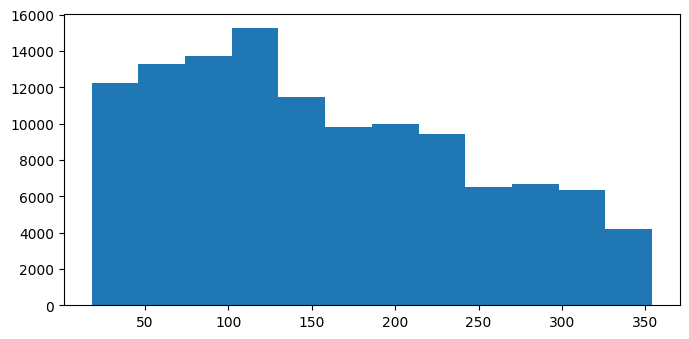

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

start_yr = 2020
min_bedrooms = 3

# columns = ["Year", "Yday", "Rent", "Bedrooms", "ID", "Lat", "Lon"]
df = pd.read_csv("all.csv", dtype={'Yday': np.int16})
df = df[df.Year >= start_yr]
df = df[df.Bedrooms >= min_bedrooms]

counts, bins = np.histogram(df['Yday'], bins=12)
plt.stairs(counts, bins, fill=True)

plt.show()


